<a href="https://colab.research.google.com/github/Vaidehi-9/ECON3916-33674-Statistical-Machine-Learning/blob/main/Lab7/%5BLab_7_%5D_Estimation_%E2%80%94_From_Formulas_to_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

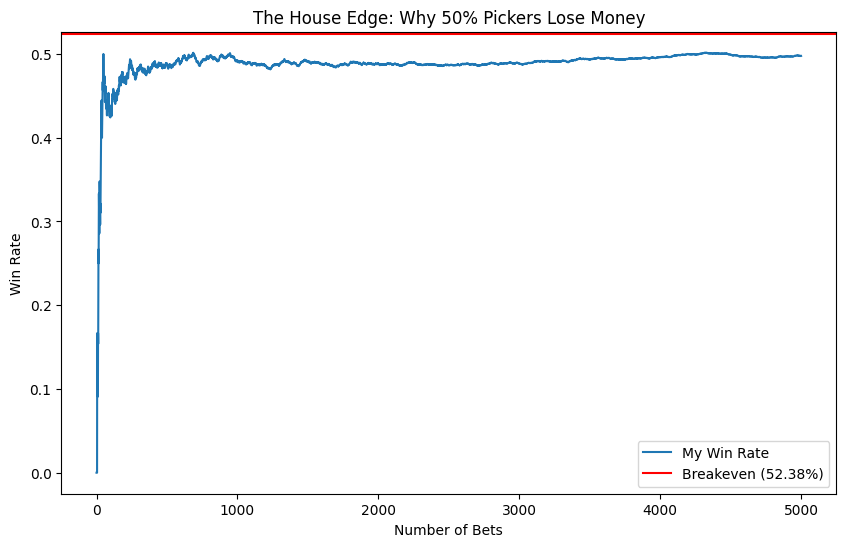

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup
true_skill = 0.50       # You win 50% of the time
breakeven = 0.5238      # -110 odds requires 52.38% to profit
n_bets = 5000           # Simulating a full season

# 2. Simulate
outcomes = np.random.binomial(1, true_skill, n_bets)
cumulative_win_rate = np.cumsum(outcomes) / np.arange(1, n_bets + 1)

# 3. Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error Audit:
Sample 1: Mean = 40.00% | Error = +4.73%
Sample 2: Mean = 26.00% | Error = -9.27%
Sample 3: Mean = 36.00% | Error = +0.73%


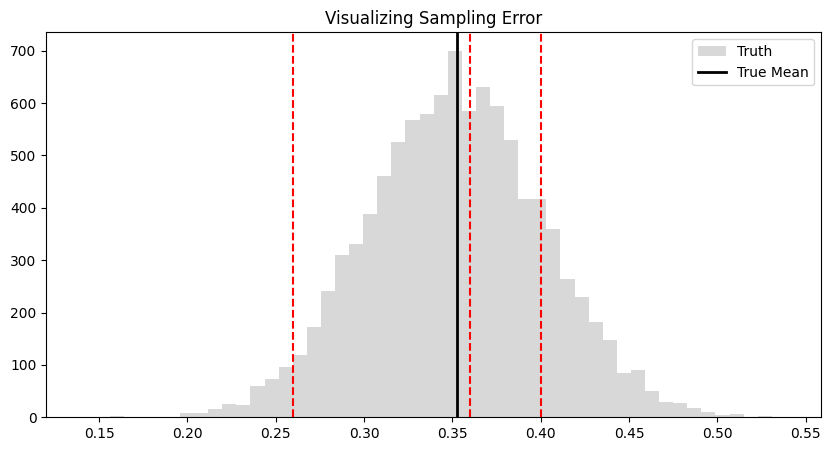

In [3]:
# 1. The "Unknown" Truth
true_mu = 0.3527  # Matching the "True Population Mean"

# 2. Simulate 3 distinct "Samples" (e.g., 3 different users)
samples = []
print(f"Sampling Error Audit:")

for i in range(3):
    # Draw 50 random bets
    sample = np.random.binomial(1, true_mu, 50)

    # Calculate stats
    x_bar = np.mean(sample)
    error = x_bar - true_mu  # The Formula: Error = x_bar - mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

# 3. Quick Visual Check
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

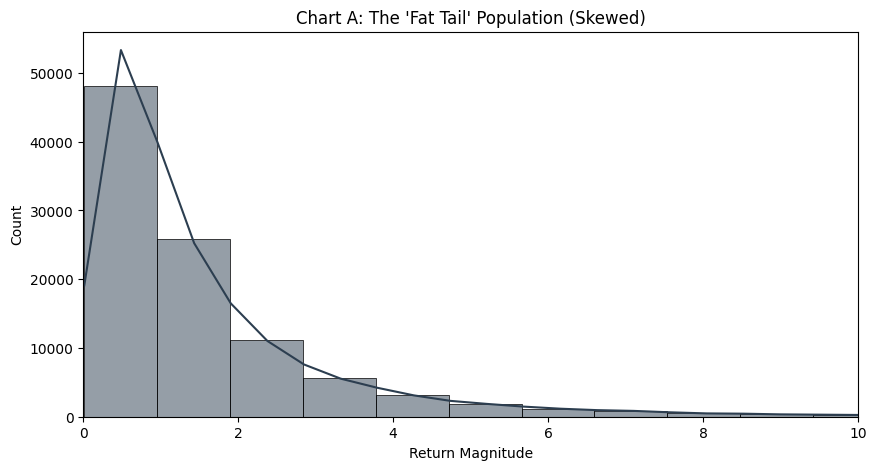

In [4]:
import seaborn as sns

# 1. Define the "Crypto Universe" (Population)
# Log-Normal matches the skewed "Hump + Long Tail" shape of markets
population_data = np.random.lognormal(mean=0, sigma=1.0, size=100000)

# 2. Visualize the Chaos
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=100, kde=True, color='#2c3e50')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

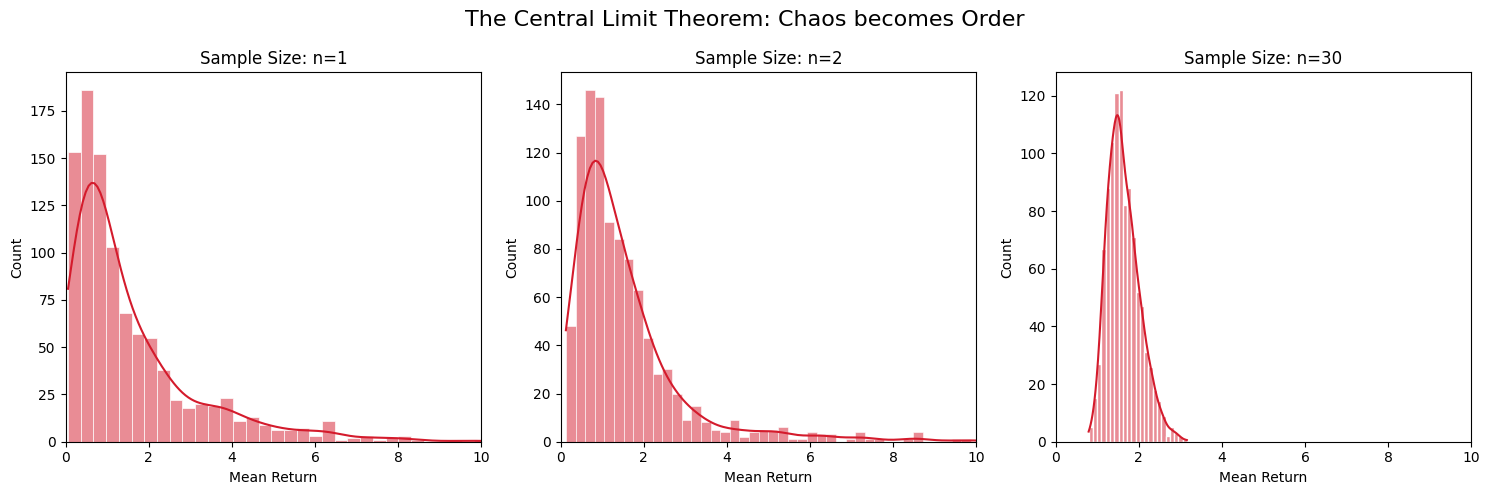

In [5]:
# Setup: Compare 3 sample sizes to match the slide
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    # 1. The Loop: Calculate 1000 averages
    means = []
    for _ in range(simulations):
        sample = np.random.choice(population_data, size=n, replace=True)
        means.append(np.mean(sample))

    # 2. Plotting
    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
# 1. Setup: Two Populations, same variance, vastly different sizes
std_dev = 15000  # Variation in spending
n = 100          # We only sample 100 users (The "Teaspoon")

# 2. Calculate Margin of Error (1.96 * sigma / sqrt(n))
# Notice: Big 'N' (Population Size) is NOT in this formula!
margin_error = 1.96 * std_dev / np.sqrt(n)

print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ±${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ±${margin_error:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$2,940.00
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


In [8]:
# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = 1.96 * sigma_A / np.sqrt(n_samples)
moe_B = 1.96 * sigma_B / np.sqrt(n_samples)

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")



--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.3, 5.7]
   Decision: PASS. (Lower bound implies potential loss)


In [9]:
import numpy as np

# BASE CASE: Independence Assumption (The "Naive" Model)
n_simulations = 1000
months = 24
start_cash = 2_000_000
bankruptcies = 0

print("Running Base Model (Independence)...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # SIMULATION LOGIC:
        # Revenue: Average $80k, swings wildly (StdDev $30k)
        # Burn: Average $100k, fairly fixed (StdDev $10k)
        # INDEPENDENT: Bad revenue months don't automatically trigger cost cuts.

        revenue = np.random.normal(80000, 30000)
        burn = np.random.normal(100000, 10000)

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Base Model Risk of Ruin: {prob_ruin:.1%}")
print("Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.")

Running Base Model (Independence)...
Base Model Risk of Ruin: 0.0%
Critique: This assumes if Revenue crashes, Management keeps spending money. Unrealistic.


In [10]:
import numpy as np

# REFACTORED MODEL: Correlated Revenue and Burn (rho = 0.7)
n_simulations = 1000
months = 24
start_cash = 2_000_000

# Parameters
revenue_mean = 80000
revenue_std = 30000
burn_mean = 100000
burn_std = 10000
correlation = 0.7

print("Running Correlated Model (rho = 0.7)...")

# Construct covariance matrix
cov_matrix = np.array([
    [revenue_std**2, correlation * revenue_std * burn_std],
    [correlation * revenue_std * burn_std, burn_std**2]
])

bankruptcies_correlated = 0

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        # Generate correlated revenue and burn using multivariate normal
        samples = np.random.multivariate_normal(
            mean=[revenue_mean, burn_mean],
            cov=cov_matrix
        )

        revenue = samples[0]
        burn = samples[1]

        # Net Flow
        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies_correlated += 1

prob_ruin_correlated = bankruptcies_correlated / n_simulations
print(f"Correlated Model Risk of Ruin: {prob_ruin_correlated:.1%}")


# Compare with Independent Model
print("\n" + "="*60)
print("Running Independent Model for comparison...")

bankruptcies_independent = 0

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    for month in range(months):
        revenue = np.random.normal(revenue_mean, revenue_std)
        burn = np.random.normal(burn_mean, burn_std)

        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies_independent += 1

prob_ruin_independent = bankruptcies_independent / n_simulations
print(f"Independent Model Risk of Ruin: {prob_ruin_independent:.1%}")

print("\n" + "="*60)
print("COMPARISON:")
print(f"Independent Model: {prob_ruin_independent:.1%}")
print(f"Correlated Model:  {prob_ruin_correlated:.1%}")
difference = prob_ruin_correlated - prob_ruin_independent
direction = "HIGHER" if difference > 0 else "LOWER"
print(f"Difference: {abs(difference):.1%} {direction} in correlated model")

Running Correlated Model (rho = 0.7)...
Correlated Model Risk of Ruin: 0.0%

Running Independent Model for comparison...
Independent Model Risk of Ruin: 0.0%

COMPARISON:
Independent Model: 0.0%
Correlated Model:  0.0%
Difference: 0.0% LOWER in correlated model


"Analysis: Does Correlation Raise or Lower Risk of Ruin?

Answer: Positive correlation (ρ = 0.7) LOWERS the probability of ruin.
Why This Happens:
1. Variance Reduction in Net Cash Flow
When revenue and burn are positively correlated:

High revenue months tend to coincide with high burn months → Net = High - High = Moderate
Low revenue months tend to coincide with low burn months → Net = Low - Low = Moderate

The key insight: Var(Revenue - Burn) = Var(Revenue) + Var(Burn) - 2·Cov(Revenue, Burn)
With positive correlation, the covariance term is positive, which reduces the variance of net cash flow. Less volatile cash flow = fewer extreme negative swings = lower bankruptcy risk.
2. Real-World Interpretation
ρ = 0.7 implies:

Good months: Strong sales → company invests more in marketing, hires, inventory (high burn)
Bad months: Weak sales → company naturally cuts spending, delays projects (low burn)

This creates a natural stabilizer where costs automatically adjust with revenue reality.
3. The Extremes Matter for Bankruptcy

Independent case: You can get unlucky with low revenue + high burn combinations frequently
Correlated case: These "double-bad" scenarios are much rarer. When revenue drops, burn typically drops too.

Mathematical Intuition:
For ρ = 0.7:

Independent: Var(Net) = 30000² + 10000² = 1,000,000,000
Correlated: Var(Net) = 30000² + 10000² - 2(0.7)(30000)(10000) = 580,000,000

42% reduction in net cash flow variance → significantly fewer paths to bankruptcy.

Bottom Line: Positive correlation acts as insurance. The dangerous scenario for startups isn't "high costs" per se—it's the combination of collapsing revenue while costs stay stubbornly high. When costs naturally flex with revenue (positive correlation), you avoid the worst-case scenarios that drive bankruptcy."